# Example 1 - Simple Stacked Classification

In [4]:
#載入資料

from sklearn import datasets

iris = datasets.load_iris()
#iris

In [3]:
X, y = iris.data[:, 1:3], iris.target
print(X)
print(y)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]
 [3.4 1.7]
 [3.7 1.5]
 [3.6 1. ]
 [3.3 1.7]
 [3.4 1.9]
 [3.  1.6]
 [3.4 1.6]
 [3.5 1.5]
 [3.4 1.4]
 [3.2 1.6]
 [3.1 1.6]
 [3.4 1.5]
 [4.1 1.5]
 [4.2 1.4]
 [3.1 1.5]
 [3.2 1.2]
 [3.5 1.3]
 [3.6 1.4]
 [3.  1.3]
 [3.4 1.5]
 [3.5 1.3]
 [2.3 1.3]
 [3.2 1.3]
 [3.5 1.6]
 [3.8 1.9]
 [3.  1.4]
 [3.8 1.6]
 [3.2 1.4]
 [3.7 1.5]
 [3.3 1.4]
 [3.2 4.7]
 [3.2 4.5]
 [3.1 4.9]
 [2.3 4. ]
 [2.8 4.6]
 [2.8 4.5]
 [3.3 4.7]
 [2.4 3.3]
 [2.9 4.6]
 [2.7 3.9]
 [2.  3.5]
 [3.  4.2]
 [2.2 4. ]
 [2.9 4.7]
 [2.9 3.6]
 [3.1 4.4]
 [3.  4.5]
 [2.7 4.1]
 [2.2 4.5]
 [2.5 3.9]
 [3.2 4.8]
 [2.8 4. ]
 [2.5 4.9]
 [2.8 4.7]
 [2.9 4.3]
 [3.  4.4]
 [2.8 4.8]
 [3.  5. ]
 [2.9 4.5]
 [2.6 3.5]
 [2.4 3.8]
 [2.4 3.7]
 [2.7 3.9]
 [2.7 5.1]
 [3.  4.5]
 [3.4 4.5]
 [3.1 4.7]
 [2.3 4.4]
 [3.  4.1]
 [2.5 4. ]
 [2.6 4.4]

In [6]:
#載入套件

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


In [7]:
#第一層模型:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()


In [8]:
# Stacking:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)#第二層模型

In [9]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


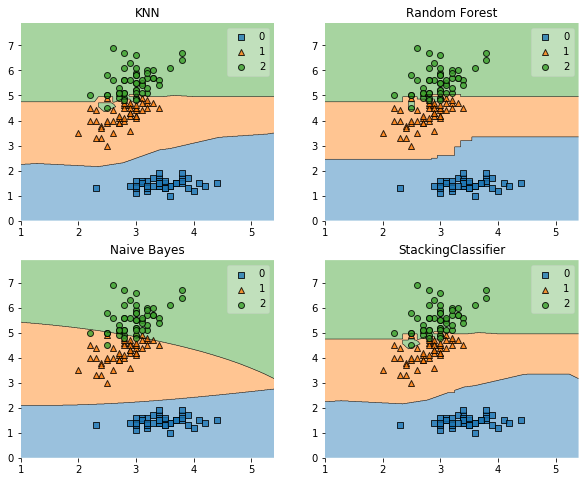

In [11]:
#視覺化:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

# Example 2 - Using Probabilities as Meta-Features

In [12]:
#載入資料
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

#載入套件
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


In [13]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,  
                          average_probas=False,
                          meta_classifier=lr)

Alternatively, the class-probabilities of the first-level classifiers can be used to train the meta-classifier (2nd-level classifier) by setting use_probas=True. 

If average_probas=True, the probabilities of the level-1 classifiers are averaged, if average_probas=False, the probabilities are stacked (recommended). 

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/


「分類問題」的 Stacking 要注意兩件事：

1.)記得加上 use_probas=True(輸出特徵才會是機率值)

2.)以及輸出的總特徵數會是：模型數量*分類數量(回歸問題特徵數=模型數量)

In [14]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.94 (+/- 0.03) [StackingClassifier]


# Example 3 - Stacked Classification and GridSearch

看不是很懂@@

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/


# Example 4 - Stacking of Classifiers that Operate on Different Feature Subsets

不是很懂，應該先了解一下Pipeline

https://kknews.cc/zh-tw/code/6bnvre3.html
    
https://www.itread01.com/content/1550014579.html



# Example 5 - Using Pre-fitted Classifiers

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

for clf in (clf1, clf2, clf3):
    clf.fit(X, y)

In [27]:
from mlxtend.classifier import StackingClassifier
import copy

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr,
                          fit_base_estimators=False)
#By setting fit_base_estimators=False, it will enforce use_clones to be False and the StackingClassifier will not re-fit these classifers to save computational time

labels = ['KNN', 'Random Forest', 'Naive Bayes', 'StackingClassifier']

sclf.fit(X, y)

print('accuracy:', np.mean(y == sclf.predict(X)))

accuracy: 0.9866666666666667



However, please note that fit_base_estimators=False is incompatible to any form of cross-validation that is done in e.g., model_selection.cross_val_score or model_selection.GridSearchCV, etc., since it would require the classifiers to be refit to the training folds. 

Thus, only use fit_base_estimators=False if you want to make a prediction directly without cross-validation.


# Example 6 -- ROC Curve with decision_function

深入介紹及比較ROC曲線及PR曲線:

https://medium.com/nlp-tsupei/roc-pr-%E6%9B%B2%E7%B7%9A-f3faa2231b8c

In [31]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


iris = datasets.load_iris()
X, y = iris.data[:, [0, 1]], iris.target
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [32]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [33]:
RANDOM_SEED = 42


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_SEED)

clf1 =  LogisticRegression()
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = SVC(random_state=RANDOM_SEED)
lr = LogisticRegression()


sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

In [34]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(sclf)

# 在y_score上使用 predict_proba()

In [35]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


ROC 曲線以 FPR 為 X 軸，TPR為 Y 軸，每一個點代表設定不同的門檻值所得到的不同的 FPR 及 TPR ，最後繪製成一條曲線。


偽陽性率：FPR (False Positive Rate)
FPR表示成 1-特異度 而特異度(specificity)意指正確判斷出負樣本，故特異度越高、FPR越低，模型越能夠正確判斷負樣本、表現越好


Specificity = True Negatives / (True Negatives + False Positives)


FPR = 1 - Specificity
    = False Positives / (False Positives + True Negatives)


真陽性率：TPR (True Positive Rate)
TPR又稱為敏感度(Sensitivity)，它也是我們熟知的召回率(Recall)，也就是正確判斷出正樣本，故TPR越高則模型越能夠正確判斷正樣本、表現越好

TPR = Sensitivity
    = True Positives / (True Positives + False Negatives)
    
    
曲線下面積：AUC(Area under curve)
AUC(曲線下面積)，所代表的意義為隨機抽取一個正樣本，分類器會正確判斷為正樣本的機率高於判斷為負樣本的機率，所以 AUC 越高則分類器正確率會越高。


In [36]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [37]:
fpr["micro"]

array([0.  , 0.  , 0.01, 0.05, 0.07, 0.11, 0.13, 0.13, 0.13, 0.13, 0.14,
       0.14, 0.15, 0.42, 0.68, 0.69, 1.  ])

In [38]:
tpr["micro"]

array([0.  , 0.34, 0.36, 0.46, 0.54, 0.66, 0.7 , 0.72, 0.76, 0.78, 0.78,
       0.84, 0.84, 0.96, 0.98, 1.  , 1.  ])

In [39]:
roc_auc["micro"]

0.8988

In [40]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.02857143, 0.14285714, 0.17142857, 0.17142857,
        0.22857143, 1.        ]),
 2: array([0.        , 0.11764706, 0.17647059, 0.20588235, 0.20588235,
        0.20588235, 0.97058824, 1.        ]),
 'micro': array([0.  , 0.  , 0.01, 0.05, 0.07, 0.11, 0.13, 0.13, 0.13, 0.13, 0.14,
        0.14, 0.15, 0.42, 0.68, 0.69, 1.  ])}

In [41]:
tpr

{0: array([0.        , 0.89473684, 1.        , 1.        ]),
 1: array([0.        , 0.06666667, 0.46666667, 0.53333333, 0.6       ,
        0.6       , 1.        ]),
 2: array([0.    , 0.3125, 0.5625, 0.625 , 0.6875, 0.875 , 0.9375, 1.    ]),
 'micro': array([0.  , 0.34, 0.36, 0.46, 0.54, 0.66, 0.7 , 0.72, 0.76, 0.78, 0.78,
        0.84, 0.84, 0.96, 0.98, 1.  , 1.  ])}

In [42]:
roc_auc

{0: 1.0, 1: 0.6971428571428572, 2: 0.7830882352941175, 'micro': 0.8988}

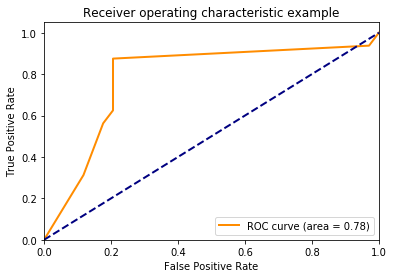

In [43]:
#視覺化:

plt.figure()

lw = 2

plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 在y_score上使用decision_function()

不是很懂decision_function()的功能是啥@@


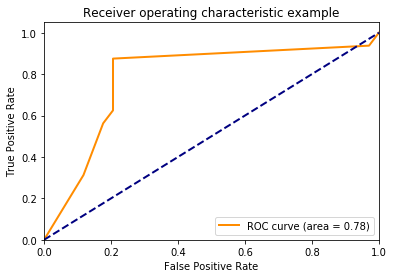

In [44]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()

lw = 2

plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()